# ADCP Assessment 2.1: Explore ADCP data on OOINet

Looking at available sensors, streams, and datasets from CGSN ADCPs in the gold copy in the kdata server. We'll open a few datasets to familiarize ourselves with the science parameters.

| Instrument Series | Model |
|-------------------|-------|
| ADCPT-F | Teledyne RDI WorkHorse Sentinel 150 kHz |
| ADCPT-G | Teledyne RDI WorkHorse Sentinel 150 kHz - inductive |
| ADCPS-J | Teledyne RDI WorkHorse LongRanger Sentinel 75 kHz |
| ADCPS-L | Teledyne RDI WorkHorse LongRanger Sentinel 75 kHz - inductive |
| ADCPS-N | Teledyne RDI WorkHorse LongRanger Sentinel 75 kHz - inductive |


In [1]:
# Import libraries needed in this notebook
import os

import numpy as np
import pandas as pd
import xarray as xr

# Import ooi-data-explorations functions
from ooi_data_explorations.common import list_sites, list_nodes, \
    list_sensors, list_methods, list_streams, list_deployments, load_kdata, \
    get_sensor_information, update_dataset, get_vocabulary

# Import ooinet functions

# Import qartod-testing functions

In [2]:
# Request a list of subsites
# list_sites()
list_nodes('CP04OSSM')

['MFC31',
 'MFD35',
 'MFD37',
 'RIC21',
 'RID26',
 'RID27',
 'SBC11',
 'SBD11',
 'SBD12']

In [3]:
# Request sensors at a node
list_sensors('CP04OSSM','MFD35')

['00-DCLENG000',
 '01-ADCPSJ000',
 '02-PRESFC000',
 '04-VELPTB000',
 '05-PCO2WB000',
 '06-PHSEND000']

In [4]:
# Pick a refdes
site = 'CP04OSSM'
node = 'MFD35'
sensor = '01-ADCPSJ000' # 75 kHz LongRanger Sentinel

# Request data recovery methods for this refdes
list_methods(site, node, sensor)

['recovered_host', 'recovered_inst', 'telemetered']

In [5]:
# Pick a method
method = 'recovered_inst'

# Request science data streams available for this method and refdes
list_streams(site, node, sensor, method)

['adcp_config', 'adcp_engineering', 'adcp_velocity_earth']

In [6]:
# Pick a data stream
stream = 'adcp_velocity_earth'

In [7]:
# Show deployments of this sensor
list_deployments(site, node, sensor)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [10]:
# Retrieve vocab that might be used in background?
vocab = get_vocabulary(site, node, sensor)
print(vocab)

[{'@class': '.VocabRecord', 'vocabId': 732, 'refdes': 'CP04OSSM-MFD35-01-ADCPSJ000', 'instrument': 'Velocity Profiler (75 kHz)', 'tocL1': 'Coastal Pioneer NES', 'tocL2': 'Offshore Surface Mooring', 'tocL3': 'Seafloor Multi-Function Node (MFN)', 'manufacturer': 'Teledyne RDI', 'model': 'WorkHorse LongRanger Sentinel 75khz', 'mindepth': 450.0, 'maxdepth': 450.0}]


In [11]:
# Import the dataset to the workspace
# If there are 15 deployments in the gold copy for CP04OSSM (not being deployed)
# I would think that we would only have 15 NetCDF files
adcp = load_kdata(site, node, sensor, method, stream, tag="*ADCPS*.nc")

Loading and Processing Data Files: 100%|██████████| 16/16 [00:10<00:00,  1.51it/s]


In [7]:
# Apply post-processing to the data - not yet 
# (bring this cell down later when we try refining the dataset for QC)
# or don't do this until new notebook for trying different QC'ing processes

In [12]:
# Show dataset details to explore variables and attributes
adcp

<xarray.Dataset>
Dimensions:                                    (bin: 60, time: 67259)
Coordinates:
  * bin                                        (bin) int32 0 1 2 3 ... 57 58 59
  * time                                       (time) datetime64[ns] 2014-12-...
Data variables: (12/47)
    corrected_echo_intensity_beam4             (time, bin) float64 81.0 ... nan
    num_cells                                  (time) uint8 60 60 60 ... 59 59
    ensemble_number                            (time) uint16 5 6 7 ... 5178 5179
    transducer_depth                           (time) uint16 4607 4610 ... 4489
    corrected_echo_intensity_beam3             (time, bin) float64 83.25 ... nan
    corrected_echo_intensity_beam2             (time, bin) float64 79.2 ... nan
    ...                                         ...
    correlation_magnitude_beam2                (time, bin) float32 129.0 ... nan
    correlation_magnitude_beam3                (time, bin) float32 129.0 ... nan
    correlation_magnitude_beam1                (time, bin) float32 124.0 ... nan
    echo_intensity_beam4                       (time, bin) float32 180.0 ... nan
    echo_intensity_beam3                       (time, bin) float32 185.0 ... nan
    echo_intensity_beam1                       (time, bin) float32 180.0 ... nan
Attributes: (12/69)
    node:                               MFD35
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_inst
    stream:                             adcp_velocity_earth
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                39.93988
    lon:                                -70.87742

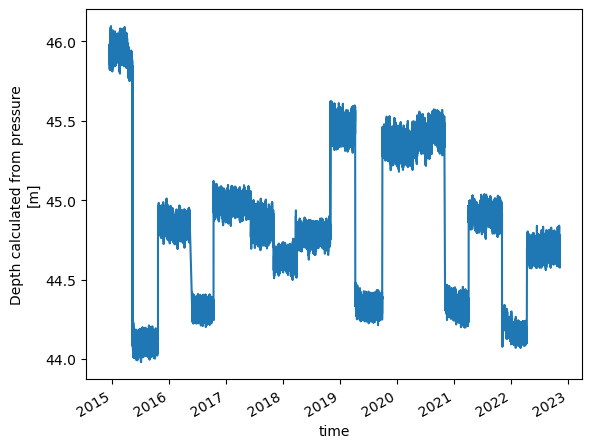

In [13]:
# plot depth parameter removing 2 "spikes" for now
depth = adcp["depth"].where(adcp["depth"]<2000).where(adcp["depth"]>40)
depth.plot()

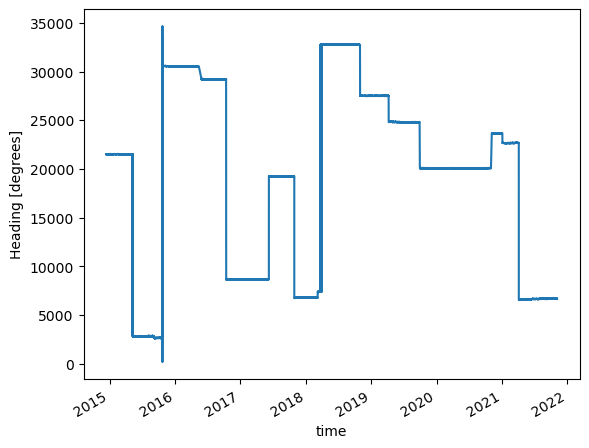

In [20]:
# plot heading parameter
adcp["heading"].plot()

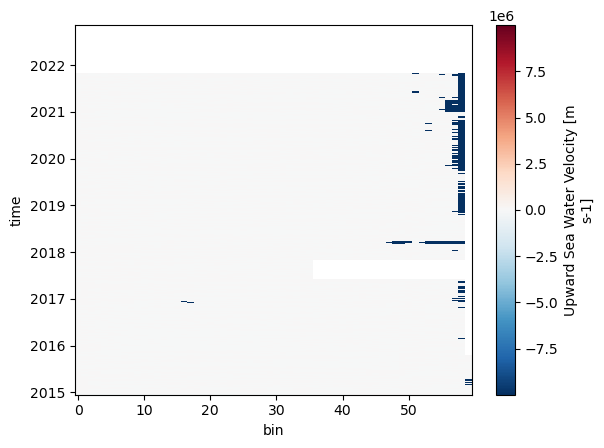

In [21]:
# plot upward velocity
adcp["upward_seawater_velocity"].plot()